## Лабораторная работа 2. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет в формате Jupyter notebook'а. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: мне − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* При сдаче до soft deadline можно получить максимум 100% баллов
* При просрочке не более, чем на 5 минут — максимум 90% баллов
* При просрочке не более, чем на 1 час — максимум 80% баллов
* При сдаче до hard deadline — максиму 70% баллов
* Сдавать задание после hard deadline нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели или максимальная глубина решающего дерева). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Задание

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/55797188147b4b519023923730aa5545). Целевой признак записан в переменной radiant_win. 

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
train_data = pd.read_csv('data/train.csv')
gold_data = pd.read_csv('data/gold.csv')
lh_data = pd.read_csv('data/lh.csv')

In [25]:
train_data.head()

,mid,patch,radiant_win
0,48434,25,True
1,37074,18,False
2,5018,8,False
3,38479,18,True
4,69147,41,False


In [26]:
gold_data.head()

,mid,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,120,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,180,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,240,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,300,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [27]:
gold_data.tail()

,mid,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
814685,81468,360,762,700,1497,1535,1102,2292,2062,1301,786,1933
814686,81468,420,844,782,2065,1976,1423,2837,2541,1383,993,2227
814687,81468,480,976,959,2504,2289,1773,3158,2995,1465,1307,2985
814688,81468,540,1058,1327,2660,2511,2136,3716,3405,1583,1484,3229
814689,81468,600,1656,1409,3376,2915,2277,4674,3725,2010,1704,3531


In [28]:
lh_data.head()

,mid,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,120,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,180,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,240,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,300,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [29]:
lh_data.tail()

,mid,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
814685,81468,360,8,0,22,26,14,32,30,7,4,28
814686,81468,420,8,0,33,34,20,42,39,7,5,32
814687,81468,480,8,1,44,38,25,48,47,7,7,57
814688,81468,540,8,7,46,42,32,60,55,9,9,61
814689,81468,600,9,7,51,49,33,70,61,9,10,66


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**(1 балл) Задание 1.** Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками из *gold.csv*.
 - Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv*. В этом вам могут помочь [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) по индексу *mid*.
 - Постройте для команд radiant (player_{0,1,2,3,4}) и dire (player_{5,6,7,8,9}) значения суммы, максимума и минимума золота и ласт хитов на 600 секунде.

In [30]:
print(train_data.shape)
print(gold_data.shape)
print(lh_data.shape)

(40734, 3)
(814690, 12)
(814690, 12)


In [31]:
def check_and_drop_NA(df, na_value=None):
    if na_value:
        df.replace(na_value, np.nan, inplace=True)
    
    print(df.isna().sum()/df.shape[0])
    
    df = df.dropna()
    print(f'Shape after dropping NA: {df.shape}')
    return df

In [32]:
# check NAs (show in percents from all data)
train_data = check_and_drop_NA(train_data, -1)
train_data.dtypes

mid            0.0
patch          0.0
radiant_win    0.0
dtype: float64
Shape after dropping NA: (40734, 3)


mid            int64
patch          int64
radiant_win     bool
dtype: object

In [33]:
gold_data = check_and_drop_NA(gold_data, -1)
gold_data.dtypes

mid         0.000000
time        0.000000
player_0    0.352257
player_1    0.311137
player_2    0.311137
player_3    0.311137
player_4    0.311137
player_5    0.311137
player_6    0.311137
player_7    0.311137
player_8    0.311137
player_9    0.311137
dtype: float64
Shape after dropping NA: (527710, 12)


mid           int64
time          int64
player_0    float64
player_1    float64
player_2    float64
player_3    float64
player_4    float64
player_5    float64
player_6    float64
player_7    float64
player_8    float64
player_9    float64
dtype: object

In [34]:
lh_data = check_and_drop_NA(lh_data, -1)
lh_data.dtypes

mid         0.000000
time        0.000000
player_0    0.352257
player_1    0.311137
player_2    0.311137
player_3    0.311137
player_4    0.311137
player_5    0.311137
player_6    0.311137
player_7    0.311137
player_8    0.311137
player_9    0.311137
dtype: float64
Shape after dropping NA: (527710, 12)


mid           int64
time          int64
player_0    float64
player_1    float64
player_2    float64
player_3    float64
player_4    float64
player_5    float64
player_6    float64
player_7    float64
player_8    float64
player_9    float64
dtype: object

In [35]:
gold_600 = gold_data[gold_data['time'] == 600]
lh_600 = lh_data[lh_data['time'] == 600]

print(gold_600.head())
print()
print(lh_600.head())
print()

          mid  time  player_0  player_1  player_2  player_3  player_4  \
80049    8004   600    3616.0    2207.0    2154.0    3024.0    3098.0   
120489  12048   600    4080.0    2119.0    3029.0    1325.0    1312.0   
150269  15026   600    1000.0    3174.0    2027.0    1000.0    1270.0   
162049  16204   600    3857.0    4060.0    2048.0    2309.0    1454.0   
218749  21874   600    4139.0    3482.0    4223.0    1877.0    2267.0   

        player_5  player_6  player_7  player_8  player_9  
80049     1626.0    3628.0    2010.0    2498.0    1472.0  
120489    3801.0    3258.0    2053.0    1496.0    2181.0  
150269    3672.0    4371.0    2008.0    3037.0    3623.0  
162049    1946.0    2994.0    2097.0    4697.0    4052.0  
218749    3386.0    3200.0    1570.0    2658.0    1531.0  

          mid  time  player_0  player_1  player_2  player_3  player_4  \
80049    8004   600      39.0      14.0      12.0      31.0      36.0   
120489  12048   600      40.0      20.0      48.0       8.0 

In [36]:
train_proceeded = train_data.join(gold_600.set_index('mid'), on='mid', rsuffix='_gold', how='inner')
train_proceeded = train_proceeded.join(lh_600.set_index('mid'), on='mid', rsuffix='_lh', how='inner')
print(train_proceeded.shape)
train_proceeded.head()

(26252, 25)


,mid,patch,radiant_win,time,player_0,player_1,player_2,player_3,player_4,player_5,...,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
0,48434,25,True,600,1372.0,3120.0,3706.0,1449.0,2009.0,1014.0,...,2.0,51.0,61.0,4.0,25.0,2.0,44.0,52.0,0.0,10.0
1,37074,18,False,600,2014.0,1393.0,1515.0,4106.0,3579.0,3349.0,...,9.0,6.0,12.0,60.0,40.0,55.0,69.0,17.0,42.0,8.0
4,69147,41,False,600,1134.0,3570.0,3213.0,2301.0,1616.0,2225.0,...,0.0,75.0,53.0,31.0,10.0,14.0,67.0,44.0,44.0,7.0
5,33300,16,True,600,4143.0,2921.0,2443.0,4002.0,1868.0,2635.0,...,52.0,31.0,10.0,48.0,6.0,31.0,4.0,46.0,7.0,92.0
7,65872,40,False,600,1881.0,1644.0,5251.0,4487.0,2861.0,6982.0,...,6.0,5.0,97.0,56.0,34.0,94.0,62.0,26.0,2.0,7.0


In [37]:
train_proceeded.drop(['time', 'time_lh'], axis=1, inplace=True)

In [38]:
RADIANT_TEAM = [f'player_{i}' for i in range(5)]
DIRE_TEAM = [f'player_{i}' for i in range(5, 9)]

In [39]:
# count sum, min and max for gold for both teams
train_proceeded['radiant_gold_sum'] = train_proceeded[RADIANT_TEAM].sum(axis=1)
train_proceeded['radiant_gold_min'] = train_proceeded[RADIANT_TEAM].min(axis=1)
train_proceeded['radiant_gold_max'] = train_proceeded[RADIANT_TEAM].max(axis=1)

train_proceeded['dire_gold_sum'] = train_proceeded[DIRE_TEAM].sum(axis=1)
train_proceeded['dire_gold_min'] = train_proceeded[DIRE_TEAM].min(axis=1)
train_proceeded['dire_gold_max'] = train_proceeded[DIRE_TEAM].max(axis=1)

In [40]:
# count sum, min and max for lh for both teams
train_proceeded['radiant_lh_sum'] = train_proceeded[[col + '_lh' for col in RADIANT_TEAM]].sum(axis=1)
train_proceeded['radiant_lh_min'] = train_proceeded[[col + '_lh' for col in RADIANT_TEAM]].min(axis=1)
train_proceeded['radiant_lh_max'] = train_proceeded[[col + '_lh' for col in RADIANT_TEAM]].max(axis=1)

train_proceeded['dire_lh_sum'] = train_proceeded[[col + '_lh' for col in DIRE_TEAM]].sum(axis=1)
train_proceeded['dire_lh_min'] = train_proceeded[[col + '_lh' for col in DIRE_TEAM]].min(axis=1)
train_proceeded['dire_lh_max'] = train_proceeded[[col + '_lh' for col in DIRE_TEAM]].max(axis=1)

In [41]:
train_proceeded.head()

,mid,patch,radiant_win,player_0,player_1,player_2,player_3,player_4,player_5,player_6,...,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,radiant_lh_sum,radiant_lh_min,radiant_lh_max,dire_lh_sum,dire_lh_min,dire_lh_max
0,48434,25,True,1372.0,3120.0,3706.0,1449.0,2009.0,1014.0,2757.0,...,3706.0,8450.0,1014.0,3024.0,143.0,2.0,61.0,98.0,0.0,52.0
1,37074,18,False,2014.0,1393.0,1515.0,4106.0,3579.0,3349.0,3884.0,...,4106.0,12566.0,1947.0,3884.0,127.0,6.0,60.0,183.0,17.0,69.0
4,69147,41,False,1134.0,3570.0,3213.0,2301.0,1616.0,2225.0,3825.0,...,3570.0,12828.0,2225.0,3825.0,169.0,0.0,75.0,169.0,14.0,67.0
5,33300,16,True,4143.0,2921.0,2443.0,4002.0,1868.0,2635.0,1737.0,...,4143.0,9820.0,1663.0,3785.0,147.0,6.0,52.0,88.0,4.0,46.0
7,65872,40,False,1881.0,1644.0,5251.0,4487.0,2861.0,6982.0,3333.0,...,5251.0,13948.0,1339.0,6982.0,198.0,5.0,97.0,184.0,2.0,94.0


### (7 баллов) Обучение классификаторов на вещественных признаках

В данном разделе будет необходимо работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)

**(1.5 балла) Задание 2.** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [145]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split

In [112]:
def plot_cv_results(means, std, param_name='', param_range=None, algo_name=''):
    plt.figure(figsize=(12, 8))
    
    if param_range:
        plt.plot(param_range, means-std, color='blue', linestyle='dashed')
        plt.plot(param_range, means, marker='o', color='red')
        plt.plot(param_range, means+std, color='blue', linestyle='dashed')
        plt.xticks(param_range)
    else:
        plt.plot(means-std, color='blue', linestyle='dashed')
        plt.plot(means, marker='o', color='red')
        plt.plot(means+std, color='blue', linestyle='dashed')
        
    if param_name:
        plt.xlabel(param_name)
    
    plt.ylabel('ROC_AUC score')
    
    title = f'GridCV results for {algo_name}' if algo_name else 'GridCV results'
    plt.title(title)
    

In [159]:
def cross_validation(model, X, y, k_folds=5, param_grid=None, scoring='roc_auc', randomized=False, 
                     random_state=42, n_iter=15, n_jobs=1):
    kf = KFold(k_folds, shuffle=True, random_state=42)
    if randomized:
        clf = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter, scoring=scoring, 
                                 cv=kf, random_state=random_state, n_jobs=n_jobs)
        clf.fit(X, y)
    else:
        clf = GridSearchCV(model, cv=kf, param_grid=param_grid, scoring=scoring, verbose=1, n_jobs=n_jobs)
        clf.fit(X, y)
    
    means = clf.cv_results_['mean_test_score']
    std = clf.cv_results_['std_test_score']
    return clf.best_params_, clf.best_score_, means, std, 
    

In [45]:
X = train_proceeded[['radiant_gold_sum', 'radiant_gold_min', 'radiant_gold_max',
                     'dire_gold_sum', 'dire_gold_min', 'dire_gold_max',
                     'radiant_lh_sum', 'radiant_lh_min', 'radiant_lh_max',
                     'dire_lh_sum', 'dire_lh_min', 'dire_lh_max']]
y = train_proceeded['radiant_win']

In [46]:
knn = KNN()
best_k, best_knn_score, knn_means, knn_stds = cross_validation(knn, X, y, param_grid={'n_neighbors': range(5, 151, 5)})

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.1min finished


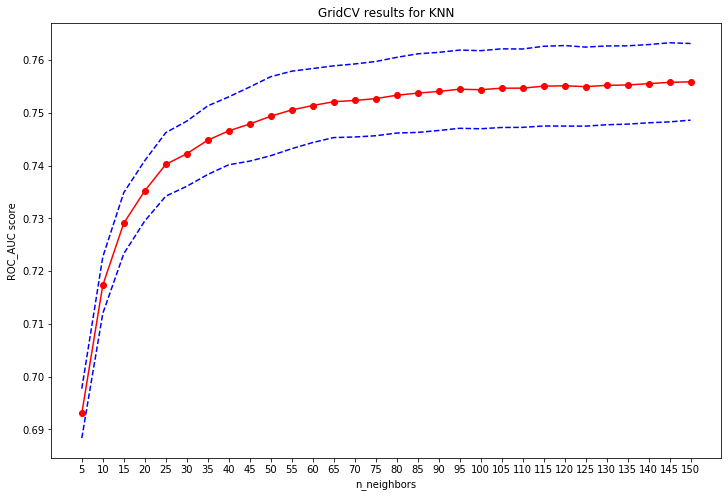

In [47]:
plot_cv_results(knn_means, knn_stds, 'n_neighbors', range(5, 151, 5), 'KNN')

In [48]:
print(best_k['n_neighbors'])

150


In [49]:
dt = DecisionTreeClassifier()
best_depth, best_dt_score, dt_means, dt_stds = cross_validation(dt, X, y, param_grid={'max_depth': range(1, 15)})

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.5s finished


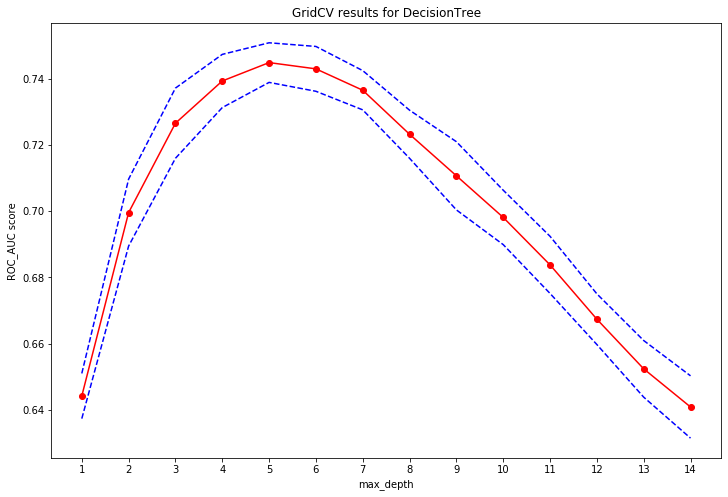

In [108]:
plot_cv_results(dt_means, dt_stds, 'max_depth', range(1, 15), 'DecisionTree')

In [51]:
print(best_depth['max_depth'])

5


In [52]:
sgd = SGDClassifier()
best_loss, best_sgd_score, sgd_means, sgd_stds = cross_validation(sgd, X, y, param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']})

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.6s finished


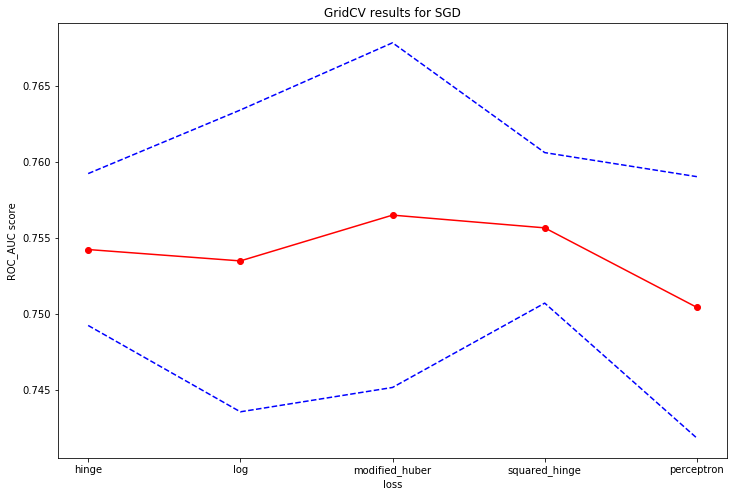

In [109]:
plot_cv_results(sgd_means, sgd_stds, 'loss', ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'SGD')

In [54]:
print(best_loss['loss'])

modified_huber


In [77]:
result_first = pd.DataFrame({
    'Algo': ['KNN', 'Decision Tree', 'SGD'],
    'Best parameter': [best_k, best_depth, best_loss],
    'Mean ROC_AUC': [best_knn_score, best_dt_score, best_sgd_score]
}).sort_values(by='Mean ROC_AUC', ascending=False)
result_first

,Algo,Best parameter,Mean ROC_AUC
2,SGD,{'loss': 'modified_huber'},0.758781
0,KNN,{'n_neighbors': 150},0.755883
1,Decision Tree,{'max_depth': 5},0.744950


Алгоритм с наибольшим значением качетсва - SGDClassifier. Оно достигается при функции потерь - 'modified_huber'.

**(0.5 балл) Задание 3.** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [57]:
rand_clf = RandomForestClassifier(n_estimators=2000)
rand_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
def RandomForestCV(X, y, n_folds=5, n_est_max=1000, param_range=None):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    if param_range is None:
        param_range = range(20, n_est_max, 10)

    results = list()
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rand_clf = RandomForestClassifier(n_estimators=n_est_max, random_state=42)
        rand_clf.fit(X_train, y_train)

        estimators = rand_clf.estimators_
        results_step = list()
        for n_est in param_range:
            rand_clf.n_estimators = n_est
            rand_clf.estimators_ = estimators[:n_est]

            y_prob = rand_clf.predict_proba(X_test)
            metric = roc_auc_score(y_test, y_prob[:, 1])

            results_step.append(metric)

        results.append(results_step)
        
    results = np.array(results)
    return results.mean(axis=0), results.std(axis=0)

In [106]:
n_est_max=1500
n_estimators = list(range(20, 200, 20)) + list(range(200, n_est_max + 1, 100))
rf_means, rf_stds = RandomForestCV(X, y, n_est_max, param_range=n_estimators)

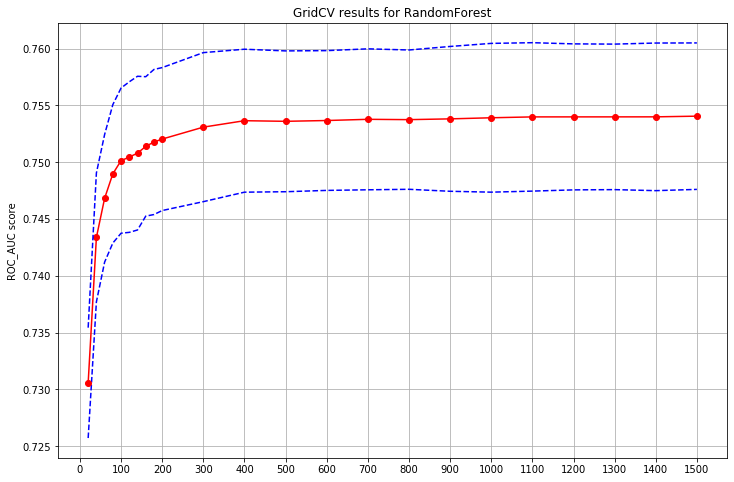

In [116]:
plot_cv_results(rf_means, rf_stds, param_range=n_estimators, algo_name='RandomForest')
plt.xticks(range(0, 1501, 100))
plt.grid()

In [120]:
best_rf_score = np.max(rf_means)
best_n_est = n_estimators[np.argmax(rf_means)]
print(f'Best result: {best_rf_score}, with {best_n_est} amount of trees.')

Best result: 0.7540591595407389, with 1500 amount of trees.


По графику видно, что качество классификатора начинает стабилизироваться начиная примерно с 300 деревьев. Для выбора наилучшего параметра воспользумеся "one std error rule" и возьмем количество эстиматоров, которое дает значение > max_score - ste.

In [130]:
ind = np.argmax(rf_means)
ind = (rf_means > (rf_means - rf_stds)[ind]).argmax()
n_estimators[ind]

80

**(1 балл) Задание 4.** Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [71]:
train_proceeded.describe()

,mid,patch,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,...,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,radiant_lh_sum,radiant_lh_min,radiant_lh_max,dire_lh_sum,dire_lh_min,dire_lh_max
count,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,...,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000,26252.000000
mean,54079.604906,29.846526,2615.777655,2942.171301,2892.888199,2763.698842,2799.328851,2610.791711,2891.073061,2852.613668,...,4061.862677,11075.257161,1690.176215,3896.706232,161.451508,4.194957,62.366258,127.609934,5.556339,59.262380
std,15542.968821,10.442477,1035.084334,1030.973364,1012.027322,1034.972070,1014.066687,1012.896698,1012.806038,991.044535,...,626.196281,1708.875799,376.384803,639.242476,30.684980,3.390815,13.336966,33.449874,4.917915,14.088829
min,12048.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40674.000000,18.000000,1722.000000,2012.750000,1992.750000,1842.000000,1897.000000,1737.750000,1974.000000,1979.000000,...,3665.000000,9941.000000,1422.000000,3495.000000,142.000000,2.000000,54.000000,104.000000,2.000000,50.000000
50%,54023.000000,28.000000,2382.000000,3032.000000,2946.000000,2703.000000,2798.000000,2397.500000,2957.500000,2887.000000,...,4018.000000,11011.000000,1638.000000,3875.000000,162.000000,3.000000,61.000000,126.000000,4.000000,59.000000
75%,67501.500000,40.000000,3457.000000,3724.000000,3659.000000,3575.250000,3578.000000,3409.000000,3666.000000,3610.000000,...,4413.000000,12159.000000,1901.000000,4274.000000,181.000000,6.000000,70.000000,150.000000,8.000000,67.000000
max,81466.000000,43.000000,8188.000000,7442.000000,8294.000000,11868.000000,7083.000000,8160.000000,7761.000000,7941.000000,...,11868.000000,19991.000000,4094.000000,8160.000000,298.000000,34.000000,173.000000,266.000000,52.000000,166.000000


Видно, что значения для параметров 'gold' и 'lh' различаются на порядок. По итогу, при аггрегировании мы получаем данные с сильным разбросом значений и которые различаются друг от друга на несколько порядков.

KNN чувствительн к размеру признаков, так он оперирует расстояниями(похожестью) между объектами. Также масштаб признаков влияет на SGDClassifier, так как в нем используется регуляризованная линейная модель. А мы знаем, что в таких моделях признаки, которые больше по значению, сильнее влияют на целевую переменную.

Приведение данных к одной шкале поможет тем, что все признаки будут иметь одинаковый вклад в алгоритм.

**(1 балл) Задание 5.** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

In [75]:
stand_scaler = StandardScaler()
stand_scaler.fit(X)
X_scaled = pd.DataFrame(stand_scaler.transform(X))
X_scaled.columns = X.columns
X_scaled.describe()

,radiant_gold_sum,radiant_gold_min,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,radiant_lh_sum,radiant_lh_min,radiant_lh_max,dire_lh_sum,dire_lh_min,dire_lh_max
count,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04,2.625200e+04
mean,4.428036e-16,3.762206e-17,-4.601260e-17,-4.729824e-16,-5.359114e-17,-1.816144e-16,2.687677e-16,-6.116969e-17,3.396812e-17,-1.908169e-16,6.441763e-17,-1.607734e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-7.592249e+00,-4.844060e+00,-6.486688e+00,-6.481143e+00,-4.490639e+00,-6.095935e+00,-5.261681e+00,-1.237176e+00,-4.676285e+00,-3.815033e+00,-1.129837e+00,-4.206418e+00
25%,-6.159158e-01,-7.042632e-01,-6.337793e-01,-6.637573e-01,-7.125190e-01,-6.284218e-01,-6.339218e-01,-6.473365e-01,-6.273104e-01,-7.058437e-01,-7.231533e-01,-6.574398e-01
50%,-3.866312e-02,-1.120089e-01,-7.004755e-02,-3.760272e-02,-1.386273e-01,-3.395683e-02,1.787526e-02,-3.524165e-01,-1.024434e-01,-4.813068e-02,-3.164691e-01,-1.862362e-02
75%,5.750234e-01,5.699808e-01,5.607571e-01,6.341968e-01,5.601390e-01,5.902314e-01,6.370825e-01,5.323433e-01,5.723856e-01,6.693745e-01,4.968992e-01,5.492130e-01
max,8.280440e+00,8.667113e+00,1.246620e+01,5.217414e+00,6.386734e+00,6.669418e+00,4.450096e+00,8.790102e+00,8.295429e+00,4.137316e+00,9.443951e+00,7.576191e+00


In [170]:
knn = KNN()
best_k, best_knn_score, knn_means, knn_stds = cross_validation(knn, X_scaled, y, param_grid={'n_neighbors': range(5, 151, 5)})

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  4.9min finished


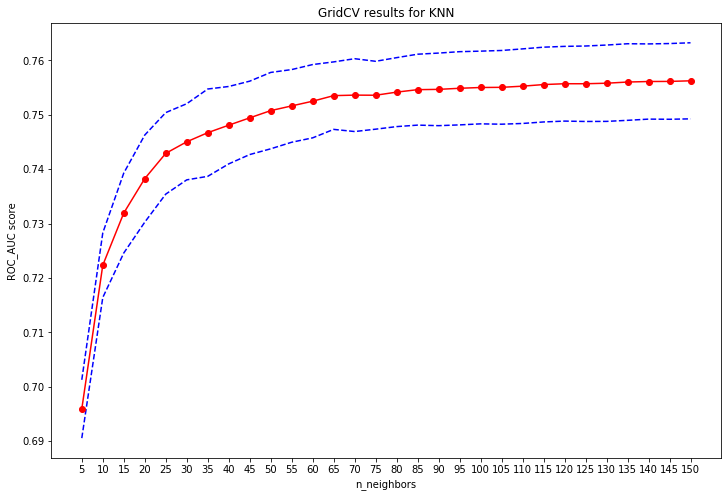

In [80]:
plot_cv_results(knn_means, knn_stds, 'n_neighbors', range(5, 151, 5), 'KNN')

In [81]:
print(best_k['n_neighbors'])

150


In [142]:
ind = np.argmax(knn_means)
ind = (knn_means > (knn_means - knn_stds)[ind]).argmax()
range(5, 151, 5)[ind]

45

In [84]:
dt = DecisionTreeClassifier()
best_depth, best_dt_score, dt_means, dt_stds = cross_validation(dt, X_scaled, y, param_grid={'max_depth': range(1, 15)})

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.2s finished


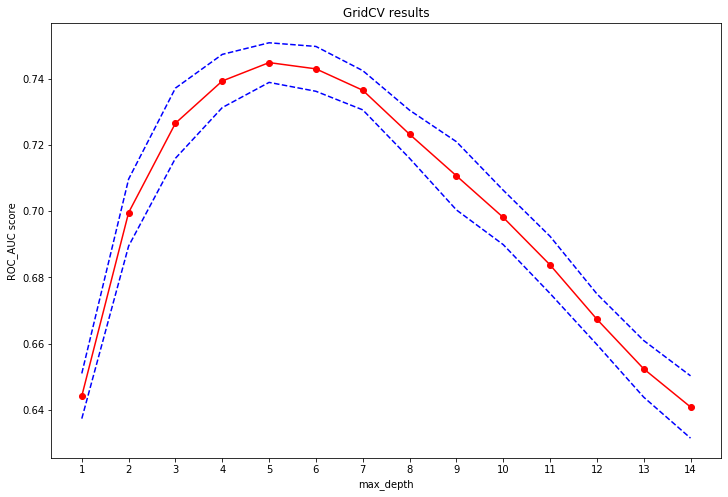

In [85]:
plot_cv_results(dt_means, dt_stds, 'max_depth', range(1, 15))

In [86]:
print(best_depth['max_depth'])

5


In [166]:
sgd = SGDClassifier()
best_loss, best_sgd_score, sgd_means, sgd_stds = cross_validation(sgd, X_scaled, y, param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']})

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.9s finished


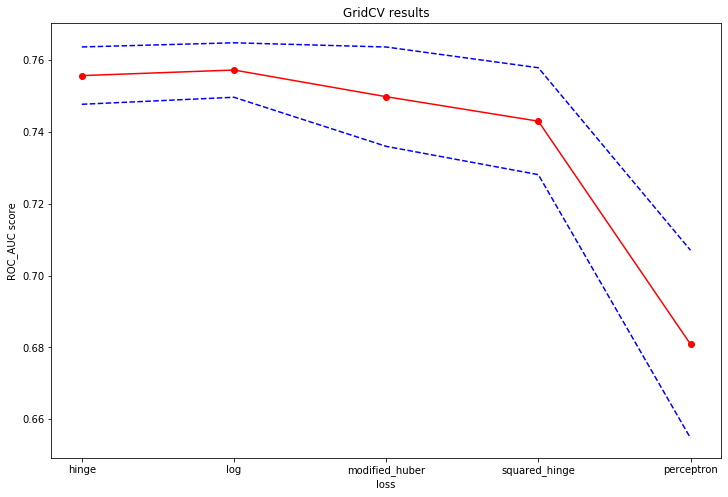

In [167]:
plot_cv_results(sgd_means, sgd_stds, 'loss', ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])

In [168]:
print(best_loss['loss'])

log


In [135]:
n_est_max=1500
n_estimators = list(range(20, 200, 20)) + list(range(200, n_est_max + 1, 100))
rf_means, rf_stds = RandomForestCV(X_scaled, y, n_est_max, param_range=n_estimators)

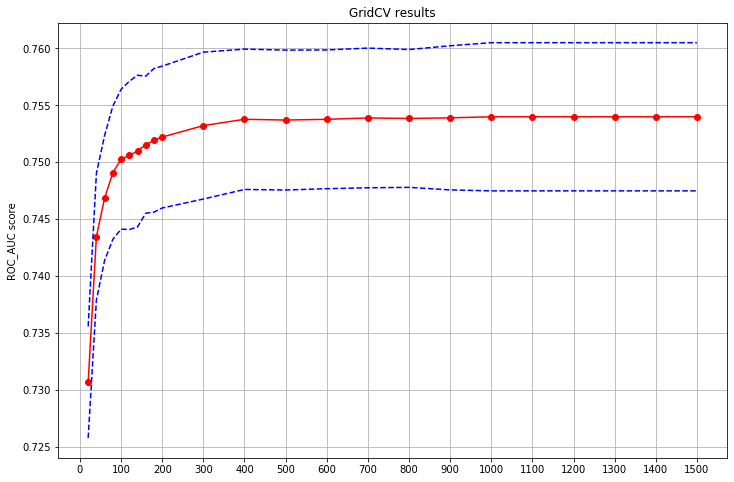

In [136]:
plot_cv_results(rf_means, rf_stds, param_range=n_estimators)
plt.xticks(range(0, 1501, 100))
plt.grid()

In [138]:
best_rf_score = np.max(rf_means)
best_n_est = n_estimators[np.argmax(rf_means)]
print(f'Best result: {best_rf_score}, with {best_n_est} amount of trees.')

Best result: 0.7539902129837868, with 1000 amount of trees.


In [171]:
result_second = pd.DataFrame({
    'Algo': ['KNN', 'Decision Tree', 'SGD', 'RandomForest'],
    'Best parameter': [best_k, best_depth, best_loss, '\'n_estimators\': ' + str(best_n_est)],
    'Mean ROC_AUC': [best_knn_score, best_dt_score, best_sgd_score, best_rf_score],
}).sort_values(by='Mean ROC_AUC', ascending=False)
result_second

,Algo,Best parameter,Mean ROC_AUC
2,SGD,{'loss': 'log'},0.757260
0,KNN,{'n_neighbors': 150},0.756259
3,RandomForest,'n_estimators': 1000,0.753990
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 5}",0.744949


**(1.5 балла) Задание 6.** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

In [175]:
knn_grid = {
    'n_neighbors': range(10, 71, 5),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

dt_grid = {
    'max_depth': range(3, 11),
    'criterion': ['gini', 'entropy'],
}

rf_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', 0.5, 0.75]
}

sgd_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet']
}

In [180]:
knn = KNN()
best_k, best_knn_score, knn_means, knn_stds = cross_validation(knn, X_scaled, y, param_grid=knn_grid, n_jobs=-1)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:  2.9min finished


In [181]:
best_k, best_knn_score

({'metric': 'manhattan', 'n_neighbors': 70}, 0.7536336920960259)

In [163]:
dt = DecisionTreeClassifier()
best_depth, best_dt_score, dt_means, dt_stds = cross_validation(dt, X_scaled, y, param_grid=dt_grid, n_jobs=-1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.6s finished


In [165]:
best_depth, best_dt_score

({'criterion': 'gini', 'max_depth': 5}, 0.7449489027636667)

In [173]:
sgd = SGDClassifier()
best_loss, best_sgd_score, sgd_means, sgd_stds = cross_validation(sgd, X_scaled, y, param_grid=sgd_grid, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.1s finished


In [174]:
best_loss, best_sgd_score

({'loss': 'log', 'penalty': 'elasticnet'}, 0.7588619304763548)

In [176]:
rf = RandomForestClassifier(n_estimators=1000)
best_rf, best_rf_score, rf_means, rf_stds = cross_validation(rf, X_scaled, y, param_grid=rf_grid, n_jobs=-1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 12.1min finished


In [177]:
best_rf, best_rf_score

({'criterion': 'entropy', 'max_features': 'sqrt'}, 0.7549612566079839)

In [182]:
result_third = pd.DataFrame({
    'Algo': ['KNN', 'Decision Tree', 'SGD', 'RandomForest'],
    'Best parameter': [best_k, best_depth, best_loss, best_rf],
    'Mean ROC_AUC': [best_knn_score, best_dt_score, best_sgd_score, best_rf_score],
}).sort_values(by='Mean ROC_AUC', ascending=False)
result_third

,Algo,Best parameter,Mean ROC_AUC
2,SGD,"{'loss': 'log', 'penalty': 'elasticnet'}",0.758862
3,RandomForest,"{'criterion': 'entropy', 'max_features': 'sqrt'}",0.754961
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 70}",0.753634
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 5}",0.744949


**(1.5 балла) Задание 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

### (2 балла) Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла) Задание 8.** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. В этом файле для каждой игры дан список героев. Напоминаем, что player_{0,1,2,3,4} – игроки команды radiant, player_{5,6,7,8,9} – игроки команды dire. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**(1.5 балла) Задание 9.** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Для SGDClassifier подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

### (3 балла) Смешивание моделей (blending)

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(2 балла) Задание 10.**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

**(1 балл) Задание 11.** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

## (2 балла) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**(2 балла) Задание 12.** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Не забудьте воспользоваться всеми полученными наработками. Отправьте результаты предсказаний ваших моделей для матчей из test.csv в соревнование на [kaggle](https://www.kaggle.com/t/55797188147b4b519023923730aa5545). Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.